#   EE 521 DSP Lab 

##  Assignment-7 | AVI KHANDELWAL, 204102301 

## Libraries used -

In [ ]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
import math as m
import cmath
import warnings
import pandas as pd
from google.colab import files
import pywt 
import io
from google.colab import drive
import cv2
from PIL import Image, ImageFilter 
import skimage.filters

warnings.filterwarnings('ignore')

#### PART A: Analog filters

##### Q1. Consider a RC circuit with input voltage Vi = 10V applied to the series RC and output Vo taken from the ends of C with R = 47kΩ and C = 47nF. Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?



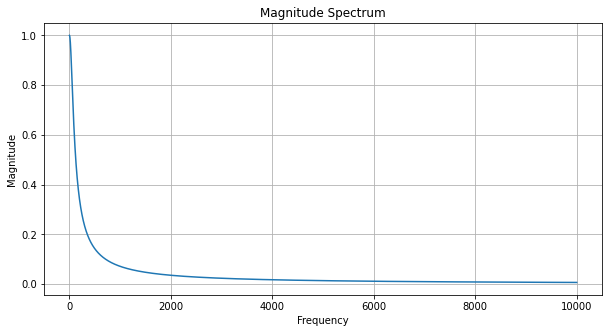

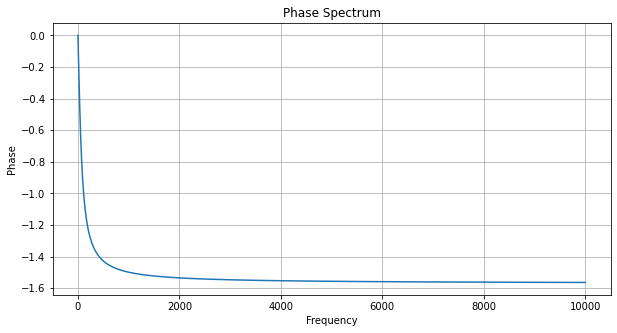

In [ ]:
R = 47*(10**3)
C = 47*(10**-9)
f = np.arange(0,10000,0.1)
H_low = (1/(R*C))/((1j)*(2*pi*f) + 1/(R*C))

mag_spect_low = abs(H_low)
phase_spect_low = np.angle(H_low)

plt.figure(1,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.plot(f,mag_spect_low) 

plt.figure(2,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase Spectrum")
plt.plot(f,phase_spect_low) 


Prove your claim by putting in the frequency as 100Hz and 10000Hz
and finding the values of Vo. Find the cutoff frequency and verify that
the behaviour is justified.

In [ ]:
f1 = np.array([100,10000])
vi = 10
H1 = (1/(R*C))/((1j)*(2*pi*f1) + 1/(R*C))
vo_low = abs(H1)*vi

for i in range(len(mag_spect_low)):
  if round(mag_spect_low[i],3) == 0.707:
    cutoff = i
    break

f_cutoff_low = f[cutoff]

print("Output for vi = 10 V")
for i in range(2):
  print("At f =",f1[i],"Hz, Vo =",vo_low[i],"V")
print("From above it can be inferred that given filter is Low Pass in nature with cutoff frequency fc=",round(f_cutoff_low),"Hz")

Output for vi = 10 V
At f = 100 Hz, Vo = 5.845633851928552 V
At f = 10000 Hz, Vo = 0.07204654251111998 V
From above it can be inferred that given filter is Low Pass in nature with cutoff frequency fc= 72 Hz


Q2.Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of
the transfer function? Find the transfer function of the circuit and
plot the frequency and magnitude spectrum. Which kind of filter is
this?

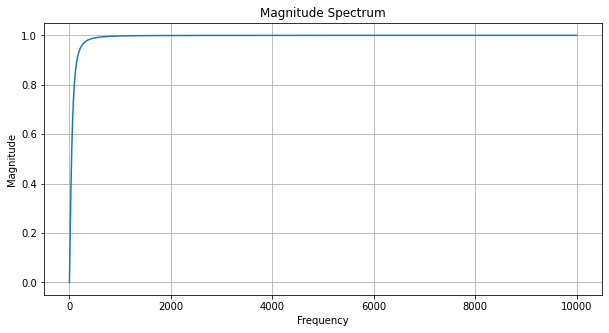

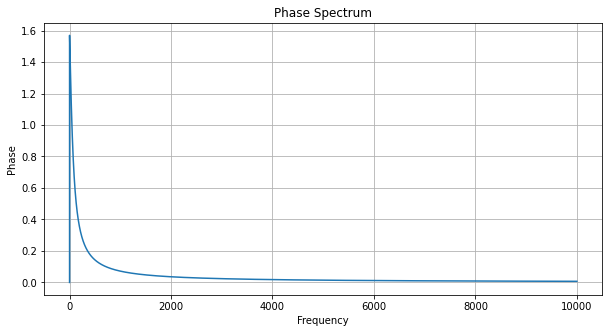

In [ ]:
R = 47*(10**3)
C = 47*(10**-9)
f = np.arange(0,10000,0.1)
H_high = ((1j)*(2*pi*f))/((1j)*(2*pi*f) + 1/(R*C))

mag_spect_high = abs(H_high)
phase_spect_high = np.angle(H_high)

plt.figure(1,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.plot(f,mag_spect_high) 

plt.figure(2,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase Spectrum")
plt.plot(f,phase_spect_high) 


Prove your claim by putting in the frequency as 100Hz and 10000Hz
and finding the values of Vo. Find the cutoff frequency and verify that
the behaviour is justified.

In [ ]:
f2 = np.array([100,10000])
vi = 10
H2 = ((1j)*(2*pi*f2))/((1j)*(2*pi*f2) + 1/(R*C))
vo_high = abs(H2)*vi

for i in range(len(mag_spect_high)):
  if round(mag_spect_high[i],3) == 0.707:
    cutoff = i
    break

f_cutoff_high = f[cutoff]
print("Output for vi = 10 V")
for i in range(2):
  print("At f =",f2[i],"Hz, Vo =",vo_high[i],"V")
print("From above it can be inferred that given filter is High Pass in nature with cutoff frequency =",round(f_cutoff_high),"Hz")

Output for vi = 10 V
At f = 100 Hz, Vo = 8.11348044116623 V
At f = 10000 Hz, Vo = 9.999740461417595 V
From above it can be inferred that given filter is High Pass in nature with cutoff frequency = 72 Hz


Q3. Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is
10 sin 2πt. Plot the amplitude and frequency spectrum.

This is a second order low pass filter with cutoff freqency = 63.6 Hz


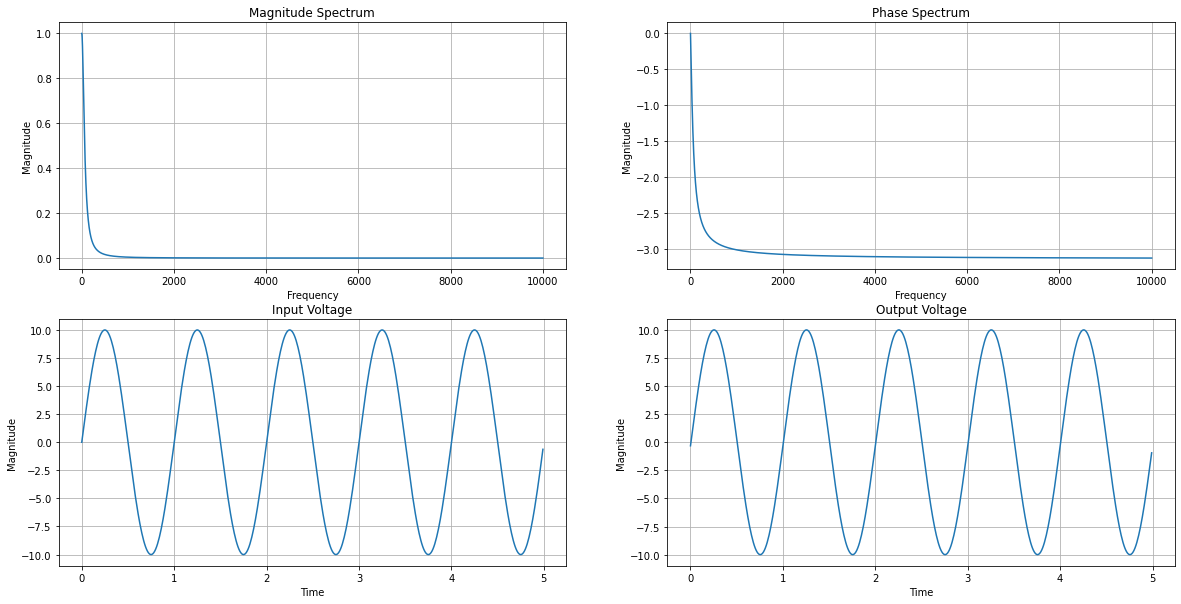

In [ ]:
R = 50*(10**3)
C = 50*(10**-9)
t = np.arange(0,5,0.01)
vi = 10*sin(2*pi*t)
f = np.arange(0,10000,0.1)

H_low2 = ((1/(R*C))/((1j)*(2*pi*f) + 1/(R*C)))**2

mag_spect_low2 = abs(H_low2)
phase_spect_low2 = np.angle(H_low2)


fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Magnitude Spectrum")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Magnitude")
ax1.grid()
ax1.plot(f,mag_spect_low2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Phase Spectrum")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax2.grid()
ax2.plot(f,phase_spect_low2)

for i in range(len(mag_spect_low2)):
  if round(mag_spect_low2[i],3) == 0.5:
    cutoff = i
    break

f_cutoff_low2 = f[cutoff]

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Input Voltage")
ax3.set_xlabel("Time")
ax3.set_ylabel("Magnitude")
ax3.grid()
ax3.plot(t,vi)

f_sig = 1
H_sig = ((1/(R*C))/((1j)*(2*pi*f_sig) + 1/(R*C)))**2
mag_gain = abs(H_sig)
phase_gain = np.angle(H_sig) 
vo = mag_gain*10*(sin(2*pi*t + phase_gain))

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Output Voltage")
ax4.set_xlabel("Time")
ax4.set_ylabel("Magnitude")
ax4.grid()
ax4.plot(t,vo)

print("This is a second order low pass filter with cutoff freqency =",f_cutoff_low2,"Hz")


Q4. Design a band pass filter using cascaded RC circuits. Make use of
the values of the 2 resistors as 20KΩ. The filter should pass all the
frequencies between 1kHz and 30kHz. Find the transfer function of
the same and plot the magnitude and amplitude of the filter.

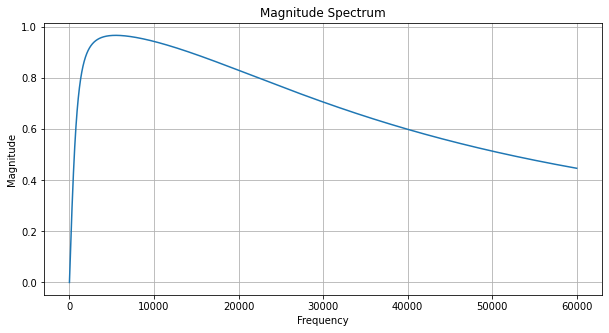

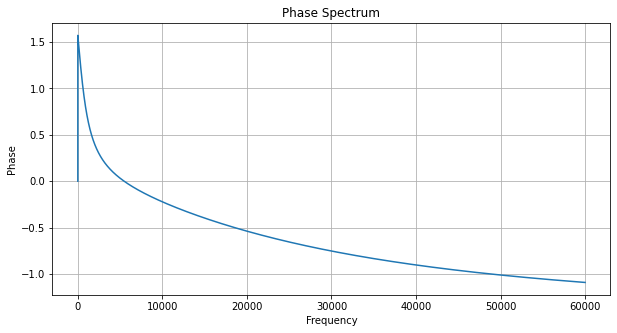

In [ ]:
fl = 1 *(10**3)
fh = 30 *(10**3)
R = 20 *(10**3)
C1 = 1/(2*pi*R*fl)
C2 = 1/(2*pi*R*fh)
f = np.arange(0,60000,0.01)

H_highpass = ((1j)*(2*pi*f))/((1j)*(2*pi*f) + 1/(R*C1))
H_lowpass = (1/(R*C2))/((1j)*(2*pi*f) + 1/(R*C2))
H_bp = H_highpass*H_lowpass

mag_spect_bp = abs(H_bp)
phase_spect_bp = np.angle(H_bp)

plt.figure(1,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.plot(f,mag_spect_bp) 

plt.figure(2,figsize = (10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.title("Phase Spectrum")
plt.plot(f,phase_spect_bp) 

#### PART B: Digital filters

Q1. Consider the difference equation:
y[n] = x[n] + x[n − 1]. Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
What kind of filter is this? Compute the transfer function to plot the frequency and amplitude plots to verify your claim. Consider the
sinusoidal input to the filter with unit amplitude. Take the sampling
rate to be 1 Hz. Find and plot the filter output.

Output of the system to the sequence x[n] is given by - [ 3.  5.  7.  9. 11. 13. 15. 17. 19.]


<StemContainer object of 3 artists>

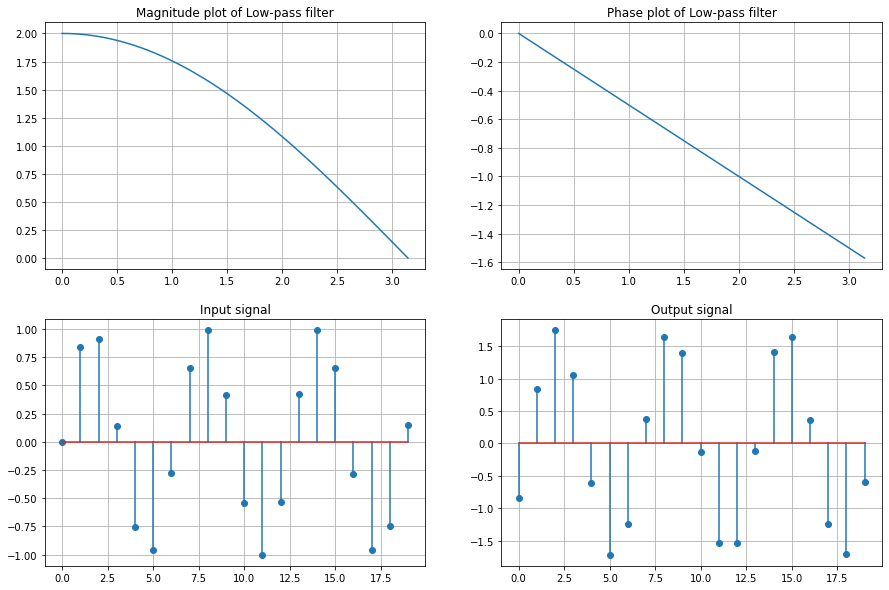

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = np.arange(0,20,1)
y = np.zeros(len(x)-1)
w = np.arange(0,pi,0.001)

for i in range(1,len(x)):
  y[i-1] = x[i] + x[i-1]
print("Output of the system to the sequence x[n] is given by -",y)

# h(n) = del(n) + del(n-1)
# H(z) = (1+z)/z
# H(w) = 2|cos(w/2)|

H_mag = 2*abs(cos(w/2))
H_phase = np.arctan(sin(w)/(1+cos(w))) - w


inp = sin(n)
mag_gain = 2*abs(cos(1/2))
phase_gain = np.arctan(sin(1)/(1+cos(1))) - 1
out = mag_gain*sin(n+phase_gain)

fig = plt.figure(1,figsize=(15,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Magnitude plot of Low-pass filter")
ax1.grid()
ax1.plot(w,H_mag)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Phase plot of Low-pass filter")
ax2.grid()
ax2.plot(w,H_phase)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Input signal")
ax3.grid()
ax3.stem(n,inp)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Output signal")
ax4.grid()
ax4.stem(n,out)

Q2. Consider the difference equation:
y[n] = 1/3(x[n] + x[n − 1] + x[n − 2])
What is this filter called? Compute the transfer function to plot the
frequency and amplitude spectrum. What are the applications of this
filter? Improve the above filter by the differential equation:
y[n] = 1/4(x[n]) + 1/2(x[n − 1]) + 1/4(x[n − 2]) and again do the whole analysis.

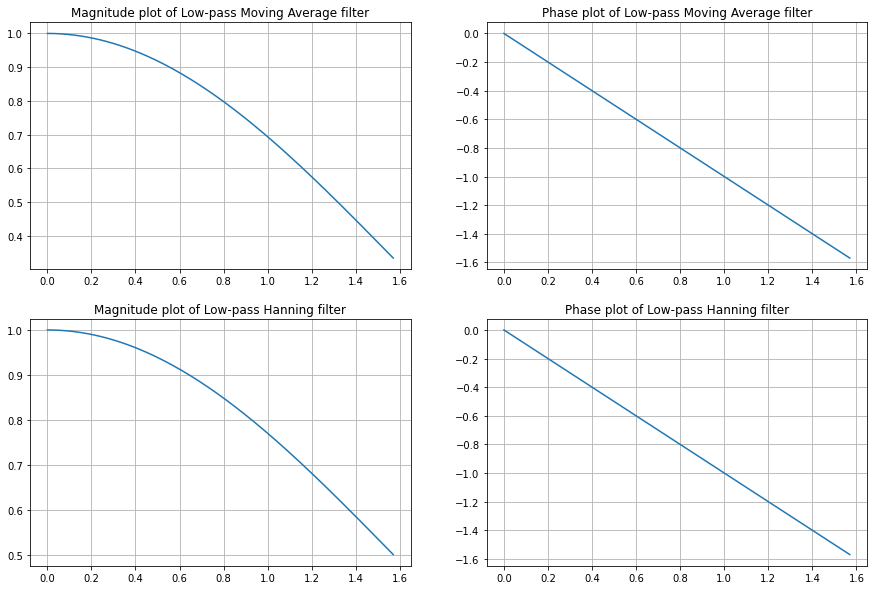

In [ ]:
# h1(n) = 1/3(del(n) + del(n-1) + del(n-2)) # Moving Average Filter, which is used to remove high frequency noise from the signal
# H1(z) = 1/3(1 + z^-1 + z^-2) # Transfer Function

w = np.arange(0,pi/2,0.01)
H1 = 1/3*(1 + np.exp(-1j*w) + np.exp(-1j*2*w) )
H1_mag = abs(H1)
H1_phase = np.angle(H1)

# h2(n) = 1/4*del(n) + 1/2*del(n-1) + 1/4*del(n-2) # Hanning Filter
# H2(z) = 1/4 + 1/2*(z^-1) + 1/4*(z^-2)
H2 = 0.25 + 0.5*np.exp(-1j*w) + 0.25*np.exp(-1j*2*w)
H2_mag = abs(H2)
H2_phase = np.angle(H2)

fig = plt.figure(1,figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Magnitude plot of Low-pass Moving Average filter")
ax1.grid()
ax1.plot(w,H1_mag)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Phase plot of Low-pass Moving Average filter")
ax2.grid()
ax2.plot(w,H1_phase)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Magnitude plot of Low-pass Hanning filter")
ax3.grid()
ax3.plot(w,H2_mag)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Phase plot of Low-pass Hanning filter")
ax4.grid()
ax4.plot(w,H2_phase)




Q3. Take any digital image of your choice and apply mean and median
filtering. What are the differences between the two? 

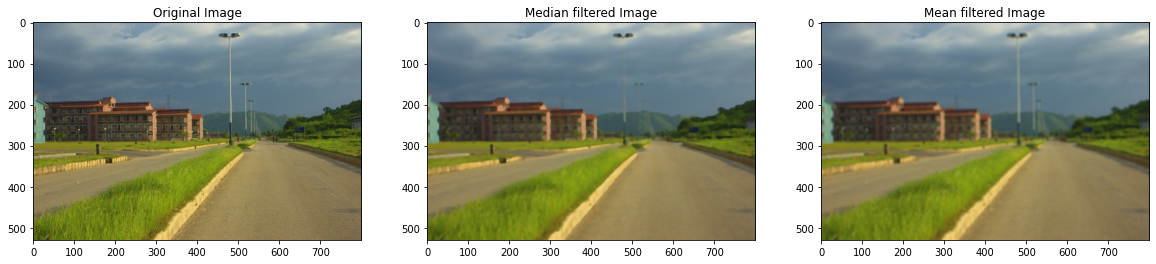

In [ ]:
#drive.mount('/content/drive') # Mounting google drive

img = cv2.imread('/content/drive/My Drive/files/IITG.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_PIL = Image.fromarray(np.uint8(img))
fig = plt.figure(1,figsize=(20,20))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Original Image")
ax1.imshow(img_PIL)

# Median Filtering
img_median = img_PIL.filter(ImageFilter.MedianFilter(size = 7))
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Median filtered Image")
ax2.imshow(img_median)

# Mean filtering
kernel = np.ones((7,7),np.float32)/49
img_mean = cv2.filter2D(img,-1,kernel)
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Mean filtered Image")
ax3.imshow(img_mean)

Take an image and add speckle noise to it. Use a particular filter to remove this noise. Take another image and add salt and pepper noise and again
use a particular filter to remove the noise. Plot the original images,
noisy images and images after noise removal respectively.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


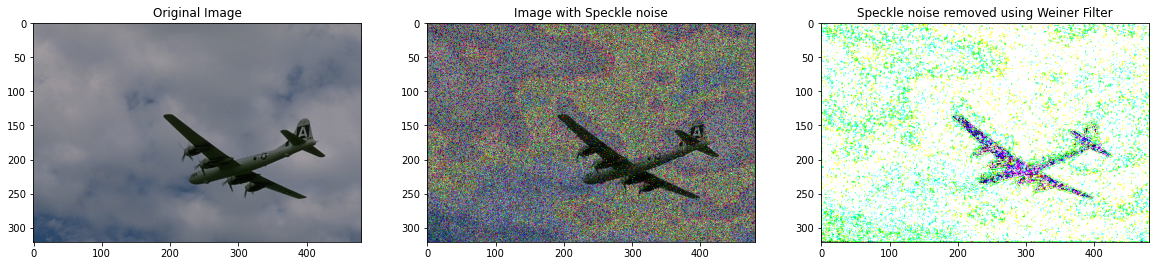

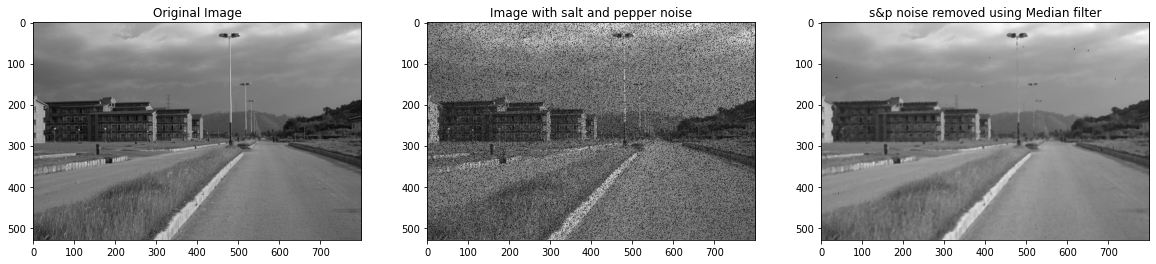

In [ ]:
from scipy.signal.signaltools import wiener
img = cv2.imread('/content/drive/My Drive/files/image.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(np.uint8(img1))
fig = plt.figure(1,figsize=(20,20))

gauss = np.random.normal(0,1,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
img_speckle = img + img * gauss

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Original Image")
ax1.imshow(img)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Image with Speckle noise")
ax2.imshow(img_speckle)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Speckle noise removed using Weiner Filter")
filtered_img = wiener(img_speckle)
ax3.imshow(filtered_img)

fig = plt.figure(2,figsize=(20,20))
img = cv2.imread('/content/drive/My Drive/files/IITG.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 =  cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = Image.fromarray(np.uint8(img1))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Original Image")
ax1.imshow(img,cmap="gray")

# Adding salt and pepper noise
s_vs_p = 0.5
amount = 0.2
num_salt = np.ceil(amount * img1.size * s_vs_p)
coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in img1.shape]
img1[coords_salt] = 1
num_pepper = np.ceil(amount* img1.size * (1 - s_vs_p))
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in img1.shape]
img1[coords_pepper] = 0
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Image with salt and pepper noise")
ax2.imshow(img1,cmap="gray")

img_PIL = Image.fromarray(np.uint8(img1))
img_PIL_median = img_PIL.filter(ImageFilter.MedianFilter(size = 5))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("s&p noise removed using Median filter")
ax3.imshow(img_PIL_median,cmap="gray")

Q4. Can we convert an analog filter into a digital filter altogether? What
is the way to do it? Use the technique to convert all the analog filters
into digital filters and plot the amplitude and frequency plots.

Yes, we can convert analog to digital filter using the bilinear transformation. This method is entirely a frequency-domain method, and as a result, some of the optimal properties of the analog filter are preserved. The bilinear transformation is a change of variables (a mapping) that is linear in both the numerator and denominator.

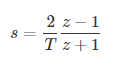

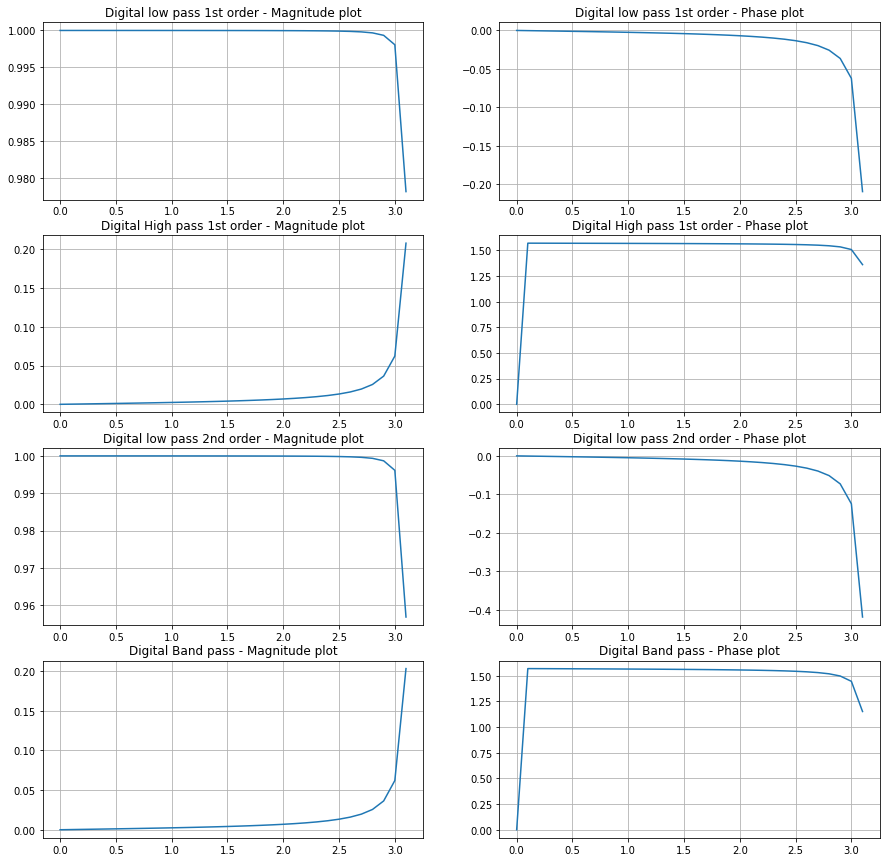

In [ ]:
# Converting analog to digital filters

R = 47*(10**3)
C = 47*(10**-9)
fl = 1 *(10**3)
fh = 30 *(10**3)
C1 = 1/(2*pi*R*fl)
C2 = 1/(2*pi*R*fh)

f = np.arange(0,10000,0.1)
w = np.arange(0,pi,0.1)
T = 1
#s = (2/T)*[(exp(jw) - 1)/(exp(jw) + 1)]
s = (2/T)*((np.exp(1j*w) - 1)/(np.exp(1j*w) + 1))

H_low_analog = (1/(R*C))/((1j)*(2*pi*f) + 1/(R*C))
H_low_digital = (1/(R*C))/(s + 1/(R*C))

H_high_analog = ((1j)*(2*pi*f))/((1j)*(2*pi*f) + 1/(R*C))
H_high_digital = s/(s + 1/(R*C))

H_low2_analog = ((1/(R*C))/((1j)*(2*pi*f) + 1/(R*C)))**2
H_low2_digital = ((1/(R*C))/(s + 1/(R*C)))**2

H_bp_analog = H_high_analog*H_low_analog
H_bp_digital = H_high_digital*H_low_digital

fig = plt.figure(1,figsize=(15,15))

ax1 = fig.add_subplot(4, 2, 1)
ax1.set_title("Digital low pass 1st order - Magnitude plot")
ax1.grid()
ax1.plot(w,abs(H_low_digital))

ax2 = fig.add_subplot(4, 2, 2)
ax2.set_title("Digital low pass 1st order - Phase plot")
ax2.grid()
ax2.plot(w,np.angle(H_low_digital))

ax3 = fig.add_subplot(4, 2, 3)
ax3.set_title("Digital High pass 1st order - Magnitude plot")
ax3.grid()
ax3.plot(w,abs(H_high_digital))

ax4 = fig.add_subplot(4, 2, 4)
ax4.set_title("Digital High pass 1st order - Phase plot")
ax4.grid()
ax4.plot(w,np.angle(H_high_digital))

ax5 = fig.add_subplot(4, 2, 5)
ax5.set_title("Digital low pass 2nd order - Magnitude plot")
ax5.grid()
ax5.plot(w,abs(H_low2_digital))

ax6 = fig.add_subplot(4, 2, 6)
ax6.set_title("Digital low pass 2nd order - Phase plot")
ax6.grid()
ax6.plot(w,np.angle(H_low2_digital))

ax7 = fig.add_subplot(4, 2, 7)
ax7.set_title("Digital Band pass - Magnitude plot")
ax7.grid()
ax7.plot(w,abs(H_bp_digital))

ax8 = fig.add_subplot(4, 2, 8)
ax8.set_title("Digital Band pass - Phase plot")
ax8.grid()
ax8.plot(w,np.angle(H_bp_digital))